In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('customer_churn_prediction_dataset.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [4]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,300,300,300.000000,300,300,300.000000,300,300,300,300,...,300,300,300,300,300,300,300,300.000000,300.000000,300
unique,300,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,0001-XXXX,Male,NaN,Yes,Yes,NaN,Yes,No,Fiber optic,No,...,Yes,No internet service,No,No internet service,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,151,NaN,155,158,NaN,156,105,105,107,...,110,103,118,107,111,164,77,NaN,NaN,161
mean,NaN,NaN,0.543333,NaN,NaN,35.783333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.226800,2477.975767,NaN
std,NaN,NaN,0.498951,NaN,NaN,21.113400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.638073,1918.540111,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.450000,30.030000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.337500,910.302500,NaN
50%,NaN,NaN,1.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.635000,2072.400000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,53.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.430000,3618.405000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

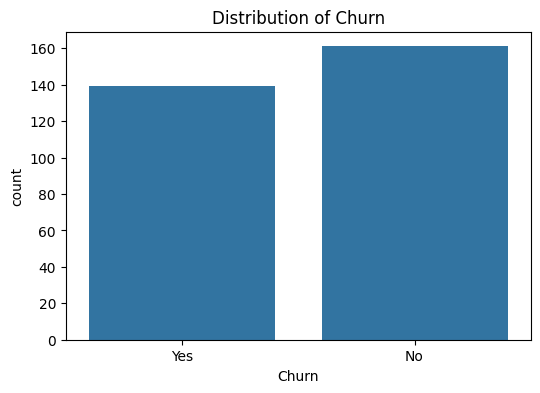

In [6]:
# Distribution of Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

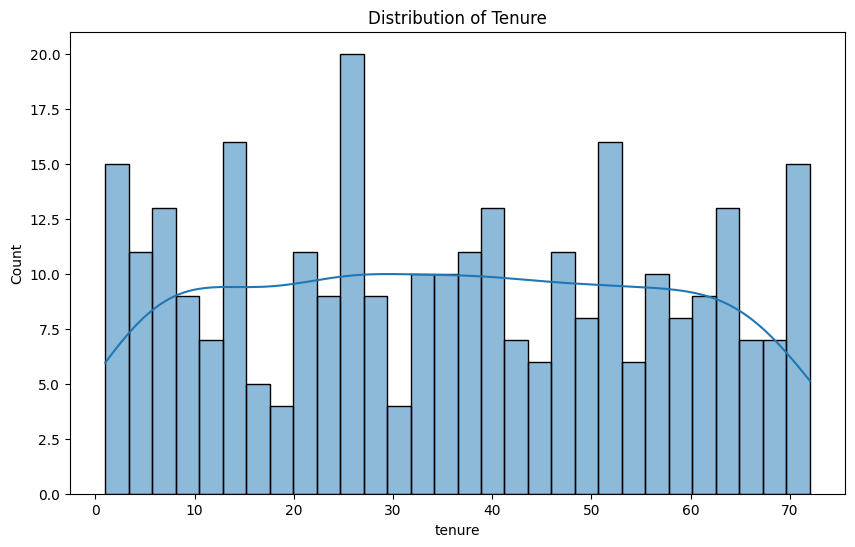

In [7]:
# Distribution of tenure
plt.figure(figsize=(10,6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.show()

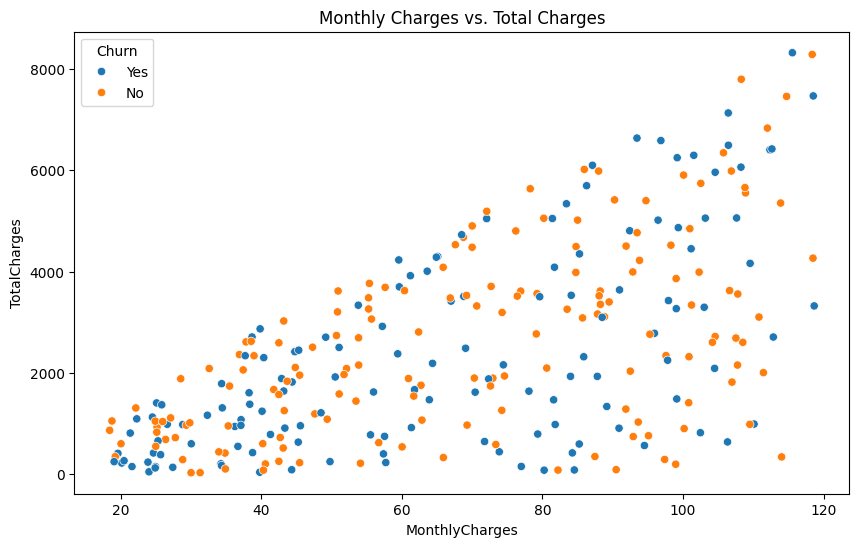

In [8]:
# Monthly Charges vs. Total Charges
plt.figure(figsize=(10,6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs. Total Charges')
plt.show()

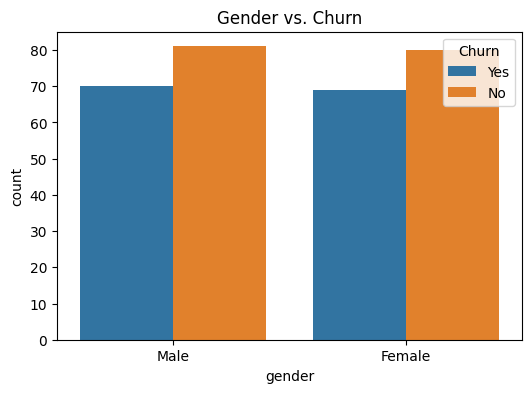

In [9]:
# Gender vs. Churn
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs. Churn')
plt.show()

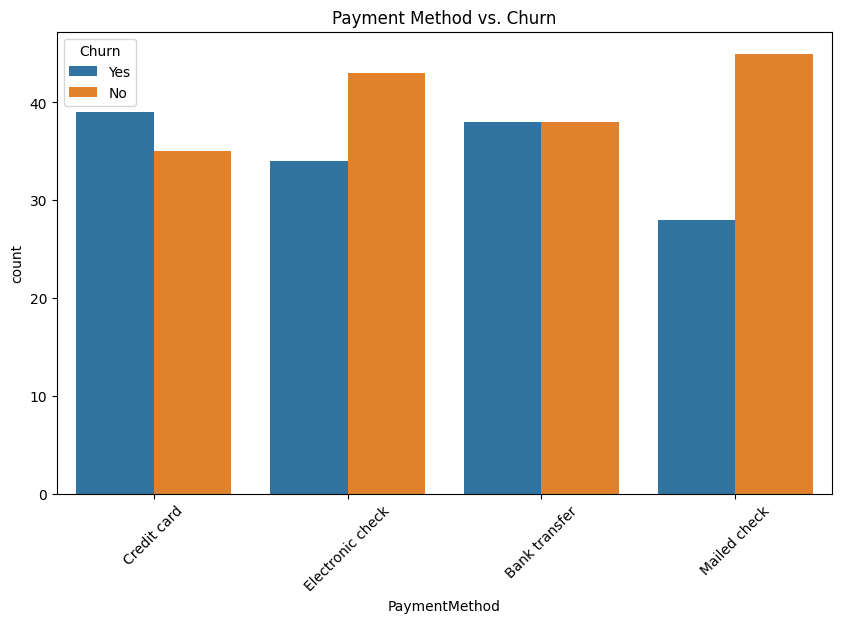

In [10]:
# Payment Method vs. Churn
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Payment Method vs. Churn')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' will turn invalid parsing to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipykernel_1570/1622706225.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [12]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [13]:
# Features and target variable
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=3)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)

In [17]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [18]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.76      0.64        34
           1       0.38      0.19      0.26        26

    accuracy                           0.52        60
   macro avg       0.47      0.48      0.45        60
weighted avg       0.48      0.52      0.47        60

Confusion Matrix:
[[26  8]
 [21  5]]
Accuracy Score:
0.5166666666666667


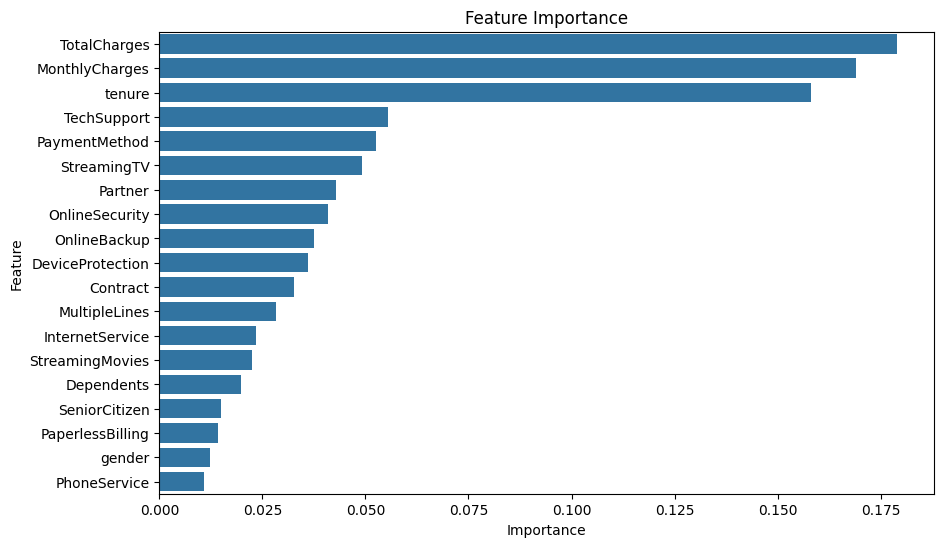

In [19]:
# Feature Importance
importances = rf_classifier.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()